In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import seaborn.objects as so
import ipywidgets as widgets


pd.options.display.float_format = '{:20,.2f}'.format
df = pd.read_csv('movie_statistic_dataset.csv')
df.head()


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.00,James Cameron,"writer,producer,director",1954,alive,7.80,"277,543.00",7.06,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.00,-,-,-,-,8.40,"1,143,642.00",8.49,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.00,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.60,"533,763.00",6.27,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.00,Joss Whedon,"writer,producer,director",1964,alive,7.30,"870,573.00",7.21,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.00,-,-,-,-,8.40,"1,091,968.00",8.46,300000000,678815482,2048359754


Box Office Analysis Dashboard

In [81]:
cleanData = df[df["director_name"] != "-"]
cleanData.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.00,James Cameron,"writer,producer,director",1954,alive,7.80,"277,543.00",7.06,460000000,667830256,2265935552
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.00,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.60,"533,763.00",6.27,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.00,Joss Whedon,"writer,producer,director",1964,alive,7.30,"870,573.00",7.21,365000000,459005868,1395316979
5,Justice League,2017-11-13,"Action,Adventure,Fantasy",120.00,Zack Snyder,"director,producer,writer",1966,alive,6.10,"456,977.00",5.72,300000000,229024295,655945209
6,Spectre,2015-10-06,"Action,Adventure,Thriller",148.00,Sam Mendes,"producer,director,miscellaneous",1965,alive,6.80,"445,461.00",6.38,300000000,200074175,879077344


C:\Users\Thomas\AppData\Local\Temp\ipykernel_8812\1610604525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData["production_date"] = pd.to_datetime(cleanData["production_date"])


<Axes: title={'center': 'Average Box Office Gross vs Production Budget'}, xlabel='Year', ylabel='Dollars in Millions'>

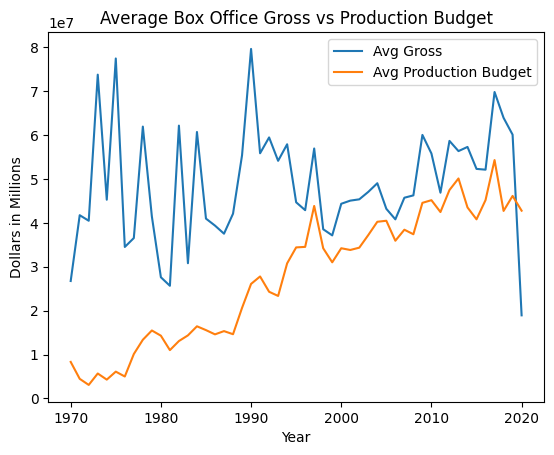

In [82]:
# avg gross box office per year vs production cost, yearly

cleanData["production_date"] = pd.to_datetime(cleanData["production_date"])
decadeDf = pd.DataFrame(columns=["Year", "Avg Gross", "Avg Production Budget"])


startYear = 1970
endYear = 2021

for x in range(startYear, endYear, 1):
    
    decadeData = cleanData[cleanData["production_date"].dt.year == x]
    numMovies =  len(decadeData)
    sumGross = sum(decadeData["Domestic gross $"])
    avgGross = sumGross / numMovies
    sumBudget = sum(decadeData["Production budget $"])
    avgBudget = sumBudget / numMovies
    decadeDf.loc[len(decadeDf)] = [x, avgGross, avgBudget]
    

decadeDf.plot( x="Year", xlabel="Year", ylabel="Dollars in Millions", title="Average Box Office Gross vs Production Budget")


In [83]:
decadeDf.head(10)

,Year,Avg Gross,Avg Production Budget
0,"1,970.00","26,745,087.67","8,312,994.00"
1,"1,971.00","41,733,617.14","4,457,142.86"
2,"1,972.00","40,469,998.50","3,071,750.00"
3,"1,973.00","73,749,950.22","5,675,222.22"
4,"1,974.00","45,259,722.89","4,277,777.78"
5,"1,975.00","77,435,040.67","6,100,000.00"
6,"1,976.00","34,498,525.09","4,990,909.09"
7,"1,977.00","36,528,631.09","10,109,090.91"
8,"1,978.00","61,918,992.75","13,360,416.67"
9,"1,979.00","41,451,952.47","15,473,333.33"


All Time Gross by Genre

<Axes: title={'center': 'Overall Box Office Gross by Genre'}, xlabel='Genre', ylabel='Dollars in Millions'>

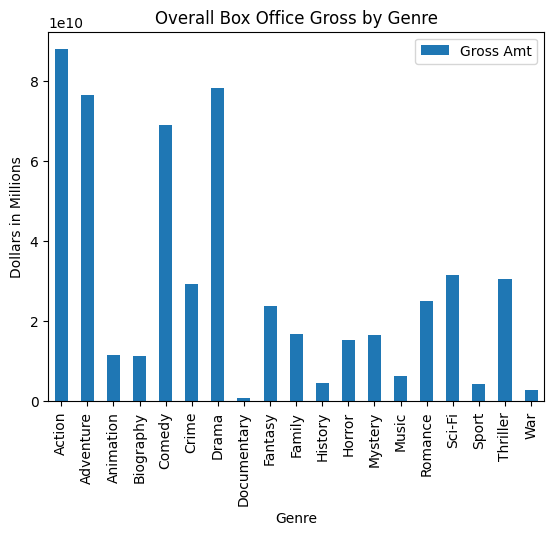

In [84]:


rowsAction = cleanData[cleanData["genres"].str.contains("Action")]
sumAction = sum(rowsAction["Domestic gross $"])

rowsAdventure = cleanData[cleanData["genres"].str.contains("Adventure")]
sumAdventure = sum(rowsAdventure["Domestic gross $"])

rowsAnimation = cleanData[cleanData["genres"].str.contains("Animation")]
sumAnimation = sum(rowsAnimation["Domestic gross $"])

rowsBiography = cleanData[cleanData["genres"].str.contains("Biography")]
sumBiography = sum(rowsBiography["Domestic gross $"])

rowsComedy = cleanData[cleanData["genres"].str.contains("Comedy")]
sumComedy = sum(rowsComedy["Domestic gross $"])

rowsCrime = cleanData[cleanData["genres"].str.contains("Crime")]
sumCrime = sum(rowsCrime["Domestic gross $"])

rowsDrama = cleanData[cleanData["genres"].str.contains("Drama")]
sumDrama = sum(rowsDrama["Domestic gross $"])

rowsDocumentary = cleanData[cleanData["genres"].str.contains("Documentary")]
sumDocumentary = sum(rowsDocumentary["Domestic gross $"])

rowsFantasy = cleanData[cleanData["genres"].str.contains("Fantasy")]
sumFantasy = sum(rowsFantasy["Domestic gross $"])

rowsFamily = cleanData[cleanData["genres"].str.contains("Family")]
sumFamily = sum(rowsFamily["Domestic gross $"])

rowsHistory = cleanData[cleanData["genres"].str.contains("History")]
sumHistory = sum(rowsHistory["Domestic gross $"])

rowsHorror = cleanData[cleanData["genres"].str.contains("Horror")]
sumHorror = sum(rowsHorror["Domestic gross $"])

rowsMystery = cleanData[cleanData["genres"].str.contains("Mystery")]
sumMystery = sum(rowsMystery["Domestic gross $"])

rowsMusic = cleanData[cleanData["genres"].str.contains("Music")]
sumMusic = sum(rowsMusic["Domestic gross $"])

rowsRomance = cleanData[cleanData["genres"].str.contains("Romance")]
sumRomance = sum(rowsRomance["Domestic gross $"])

rowsSciFi = cleanData[cleanData["genres"].str.contains("Sci-Fi")]
sumSciFi = sum(rowsSciFi["Domestic gross $"])

rowsSport = cleanData[cleanData["genres"].str.contains("Sport")]
sumSport = sum(rowsSport["Domestic gross $"])

rowsThriller = cleanData[cleanData["genres"].str.contains("Thriller")]
sumThriller = sum(rowsThriller["Domestic gross $"])

rowsWar = cleanData[cleanData["genres"].str.contains("War")]
sumWar = sum(rowsWar["Domestic gross $"])

genreNames = ["Action","Adventure","Animation","Biography","Comedy","Crime","Drama","Documentary","Fantasy","Family", "History", "Horror", "Mystery", "Music", "Romance", "Sci-Fi", "Sport", "Thriller", "War"]
genreAmts = [sumAction , sumAdventure, sumAnimation,sumBiography, sumComedy, sumCrime, sumDrama, sumDocumentary, sumFantasy, sumFamily, sumHistory, sumHorror, sumMystery, sumMusic, sumRomance, sumSciFi, sumSport, sumThriller, sumWar]
values = list(zip(genreNames,genreAmts))
genreDf = pd.DataFrame(values, columns = ["Genre","Gross Amt"])

genreDf.plot.bar( x = "Genre", ylabel="Dollars in Millions",  title="Overall Box Office Gross by Genre")




    


Top Five Directors of 2022:

<Axes: xlabel='Director Name', ylabel='Hundreds of millions ($)'>

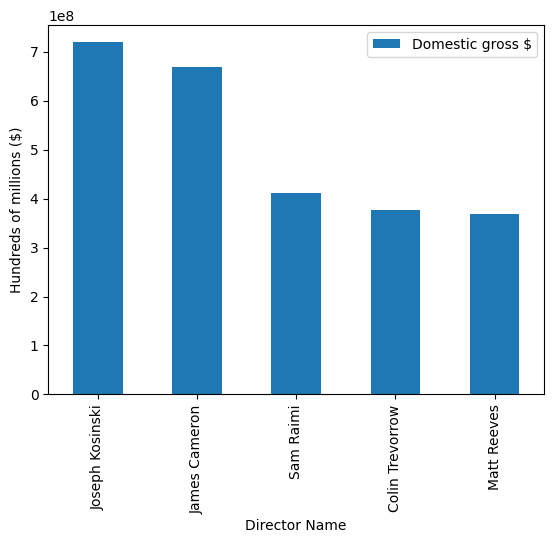

In [85]:

directorData = cleanData.sort_values(by=["Domestic gross $"], ascending=False)
currentYear = directorData[directorData["production_date"] >= "2022-01-01"]
topFive = currentYear.iloc[[0,1,2,3,4,]]
topFive.plot.bar( y = "Domestic gross $" , x = "director_name", ylabel = "Hundreds of millions ($)" , xlabel = "Director Name" )


In [94]:

ddGenre = widgets.Dropdown(
    options= genreNames,
    value="Action",
    description='Genre:',
    disabled=False,
)
ddGenre

Dropdown(description='Genre:', options=('Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'D…

In [97]:

def predictByGenre():
    genreChoice = ddGenre.value
    Raw = cleanData[cleanData["genres"].str.contains(genreChoice)]
    YearGross = Raw[["production_date", "Domestic gross $"]]
    YearGross["production_date"] = YearGross["production_date"].dt.year
    y = YearGross["Domestic gross $"].values.reshape(-1, 1)
    x = YearGross["production_date"].values.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,)
    LinReg = LinearRegression()
    LinReg.fit(x_train, y_train)
    print(LinReg.intercept_)
    print(LinReg.coef_)
    predValue = LinReg.predict([[2023]])
    print(predValue)
    Raw.head()
    sns.regplot(x="production_date", y="Domestic gross $", data=YearGross).set(title = "Domestic Gross of " + ddGenre.value + " Movies over Time")


[-6.22799952e+08]
[[333727.6994856]]
[[52331184.36817932]]


C:\Users\Thomas\AppData\Local\Temp\ipykernel_8812\847402320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YearGross["production_date"] = YearGross["production_date"].dt.year


Button(description='Predict', style=ButtonStyle())

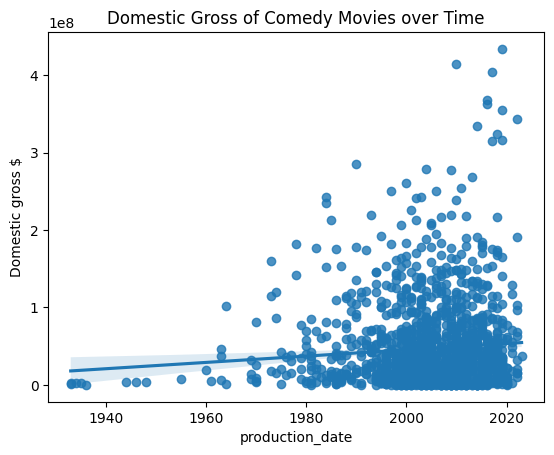

In [98]:
Pbutton = widgets.Button(
    description='Predict',
)
Pbutton.on_click(predictByGenre())
Pbutton
    
